In [20]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

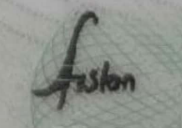

(128, 182, 3)


In [21]:
Sig = cv2.imread("Signature.png")
cv2_imshow(Sig)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(Sig.shape)

In [22]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

rotated_images = []

for angle in range(1, 361):
    rotated = rotate_image(Sig, angle)
    rotated_images.append(rotated)

In [23]:
def set_brightness(images,value):
  altered_brightness = []
  for i in images:
    altered_brightness.append(i+value)
  return altered_brightness

add50 = set_brightness(rotated_images,50)
sub50 = set_brightness(rotated_images,-50)


In [24]:
rot_bright_images = rotated_images + add50 + sub50
len(rot_bright_images)

1080

In [25]:
def add_noise(image, probability=0.02):
    row, col, ch = image.shape
    noisy = image.copy()
    # Salt noise
    salt_mask = np.random.rand(row, col, ch) < probability
    noisy[salt_mask] = 255
    # Pepper noise
    pepper_mask = np.random.rand(row, col, ch) < probability
    noisy[pepper_mask] = 0
    return noisy


In [26]:
random_indices = np.random.choice(len(rot_bright_images),200, replace=False)

for i in random_indices:
    rot_bright_images[i] = add_noise(rot_bright_images[i])


In [27]:
print(random_indices)

[  79  795  399 1018 1060    8  721  649  375  356  747  247  185  952
   68  558  707   59  849  922  731  347  949  634  986  118  373 1030
  311  967  526  923   51  296  193  368  715  839  972  177  452  310
  238   23  874  592  729  862  981  319   71  485  959  518  342 1033
  430  117   85  840  991  414  947  817  225   11  928   53  261  593
  621  990  622  425  505  406  123  581  976  909   17  938  830  101
 1037  903  948  806   78  945  142  374  743  930   20  552  211  214
  937  810   88  566  843  582  150  163 1074 1051  107  995   89  400
  856  604  258  666   12  716  800  528  104  476 1036  532  304 1038
   44  901  943 1052  774  545  918  823  833  873  349  993  392  790
   40  821  600  426  897  744  832  935 1058  458  692  157  601  681
  939  805  491  932  655  987  829  602  626  344  953  907  411  363
   76  899  246 1072  340  875  685  456  480 1008  197 1054  787  727
  316 1019  781  291  119  548  640  585   10  696  646  268  422  752
  327 

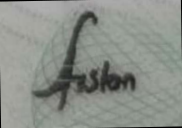

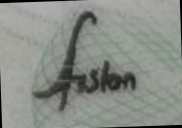

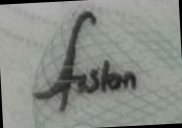

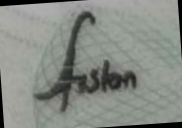

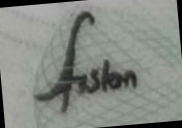

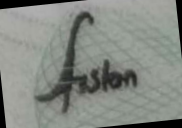

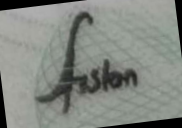

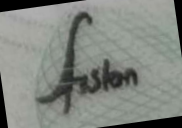

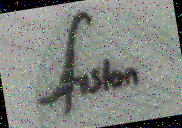

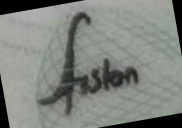

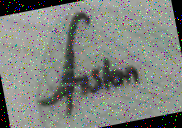

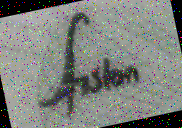

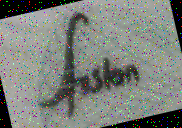

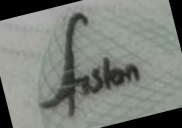

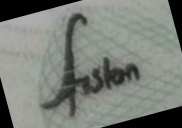

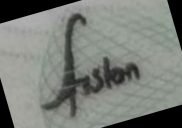

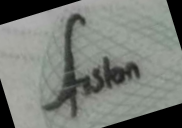

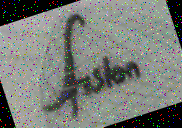

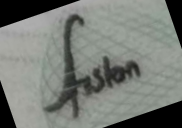

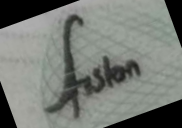

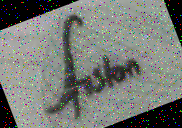

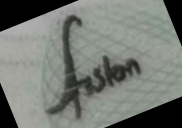

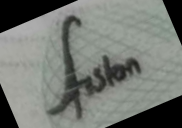

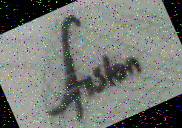

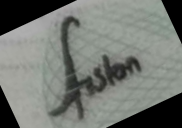

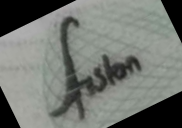

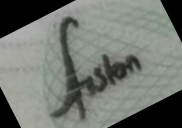

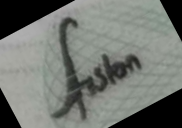

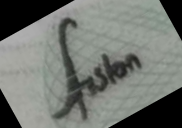

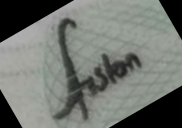

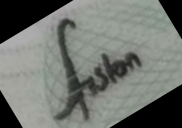

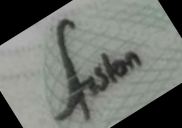

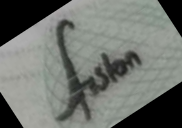

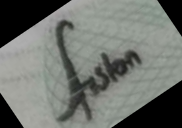

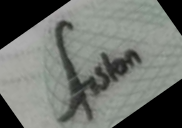

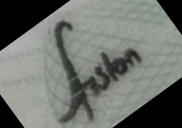

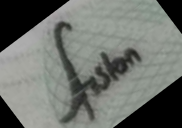

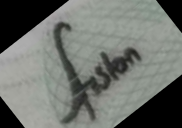

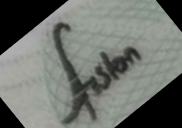

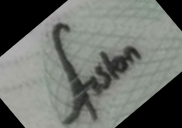

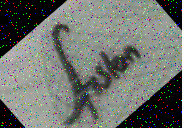

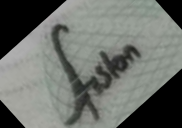

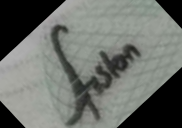

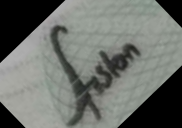

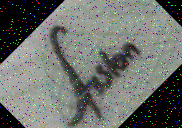

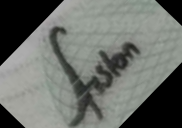

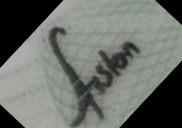

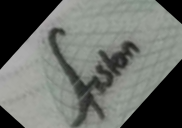

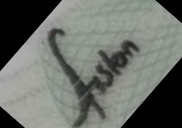

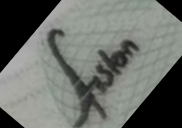

In [29]:
#showing just first 50 images
for i in range(50):
  cv2_imshow(rot_bright_images[i])